# Imports

In [31]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from helpers import *

# Loading dataset

In [32]:
# Loading the dataset
lipids = loading_lipids()

# Selecting lipids data in the 12 section of the brain
section_12 = select_section_lipids(lipids)

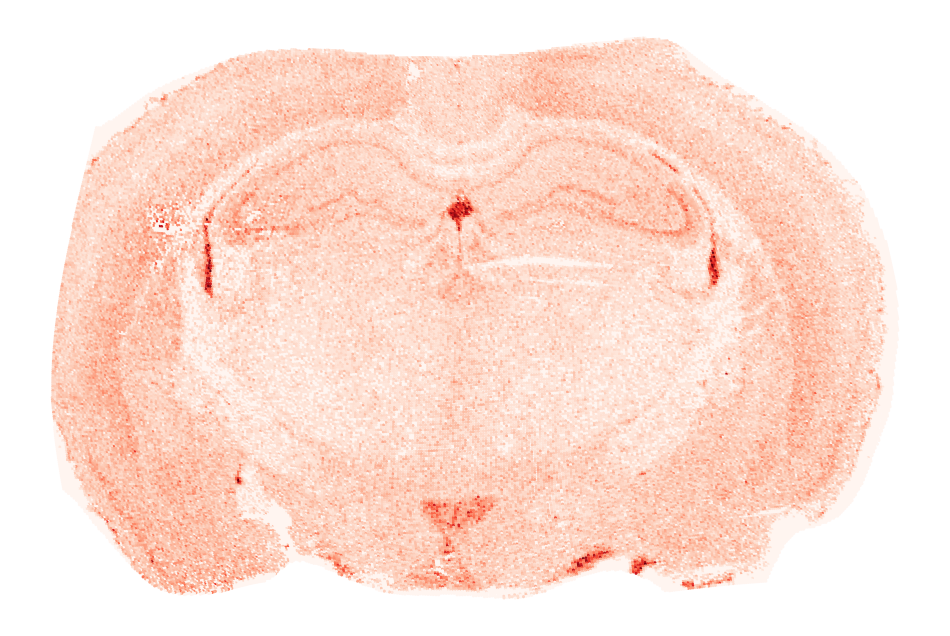

In [33]:
# Plot a single lipid
plt.figure(figsize=(12, 8))

dot_size = 1.5

sc1 = plt.scatter(section_12['z_ccf'], - section_12['y_ccf'], c=section_12['SHexCer 38:1;3'], s=dot_size, cmap="Reds", alpha=1)

plt.axis('off')
plt.show()

# note the large black contour is just a matrix from the experiment and not the brain, you should remove it

# Data exploration

In [34]:
# Print dataset
print(section_12.head())

                          x_ccf     y_ccf     z_ccf  LPC O-16:2  LPC 16:0_dup  \
section12_pixel23_121  7.621452  0.312450  7.882461    0.000140      0.000112   
section12_pixel23_122  7.621452  0.313953  7.859683    0.000213      0.000112   
section12_pixel23_123  7.621452  0.315503  7.837031    0.000154      0.000100   
section12_pixel23_124  7.621452  0.317101  7.814505    0.000147      0.000113   
section12_pixel23_125  7.621452  0.318745  7.792104    0.000229      0.000112   

                       LPC O- 18:3  LPC O-18:2  LPC O-16:2_dup  LPC 15:1  \
section12_pixel23_121     0.000116    0.000125        0.000214  0.000100   
section12_pixel23_122     0.000114    0.000125        0.000204  0.000162   
section12_pixel23_123     0.000117    0.000134        0.000195  0.000151   
section12_pixel23_124     0.000114    0.000136        0.000229  0.000154   
section12_pixel23_125     0.000115    0.000206        0.000100  0.000100   

                       LPC 18:1  ...  PG(42:6)   Hex2Cer

In [35]:
# Info on the dataset
print(section_12.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94747 entries, section12_pixel23_121 to section12_pixel308_161
Columns: 208 entries, x_ccf to y
dtypes: float32(3), float64(202), int64(3)
memory usage: 152.0+ MB
None


In [36]:
# Statistics
print(section_12.describe())

              x_ccf         y_ccf         z_ccf    LPC O-16:2  LPC 16:0_dup  \
count  94747.000000  94747.000000  94747.000000  94747.000000  94747.000000   
mean       7.621452      3.890388      5.834257      0.001170      0.000497   
std        0.003200      1.918976      2.687550      0.000514      0.000207   
min        7.621452      0.312450      0.865772      0.000100      0.000100   
25%        7.621452      2.233024      3.519835      0.000826      0.000357   
50%        7.621452      3.885575      5.827421      0.001152      0.000471   
75%        7.621452      5.545235      8.144789      0.001482      0.000608   
max        7.621452      7.438256     10.872088      0.004125      0.003632   

        LPC O- 18:3    LPC O-18:2  LPC O-16:2_dup      LPC 15:1      LPC 18:1  \
count  94747.000000  94747.000000    94747.000000  94747.000000  94747.000000   
mean       0.000601      0.000510        0.000458      0.001122      0.000503   
std        0.000219      0.000173        0.00

In [37]:
# x_cff is a constant value, because we are considering one section
np.min(section_12['x_ccf'])
np.max(section_12['x_ccf'])

7.6214518547058105

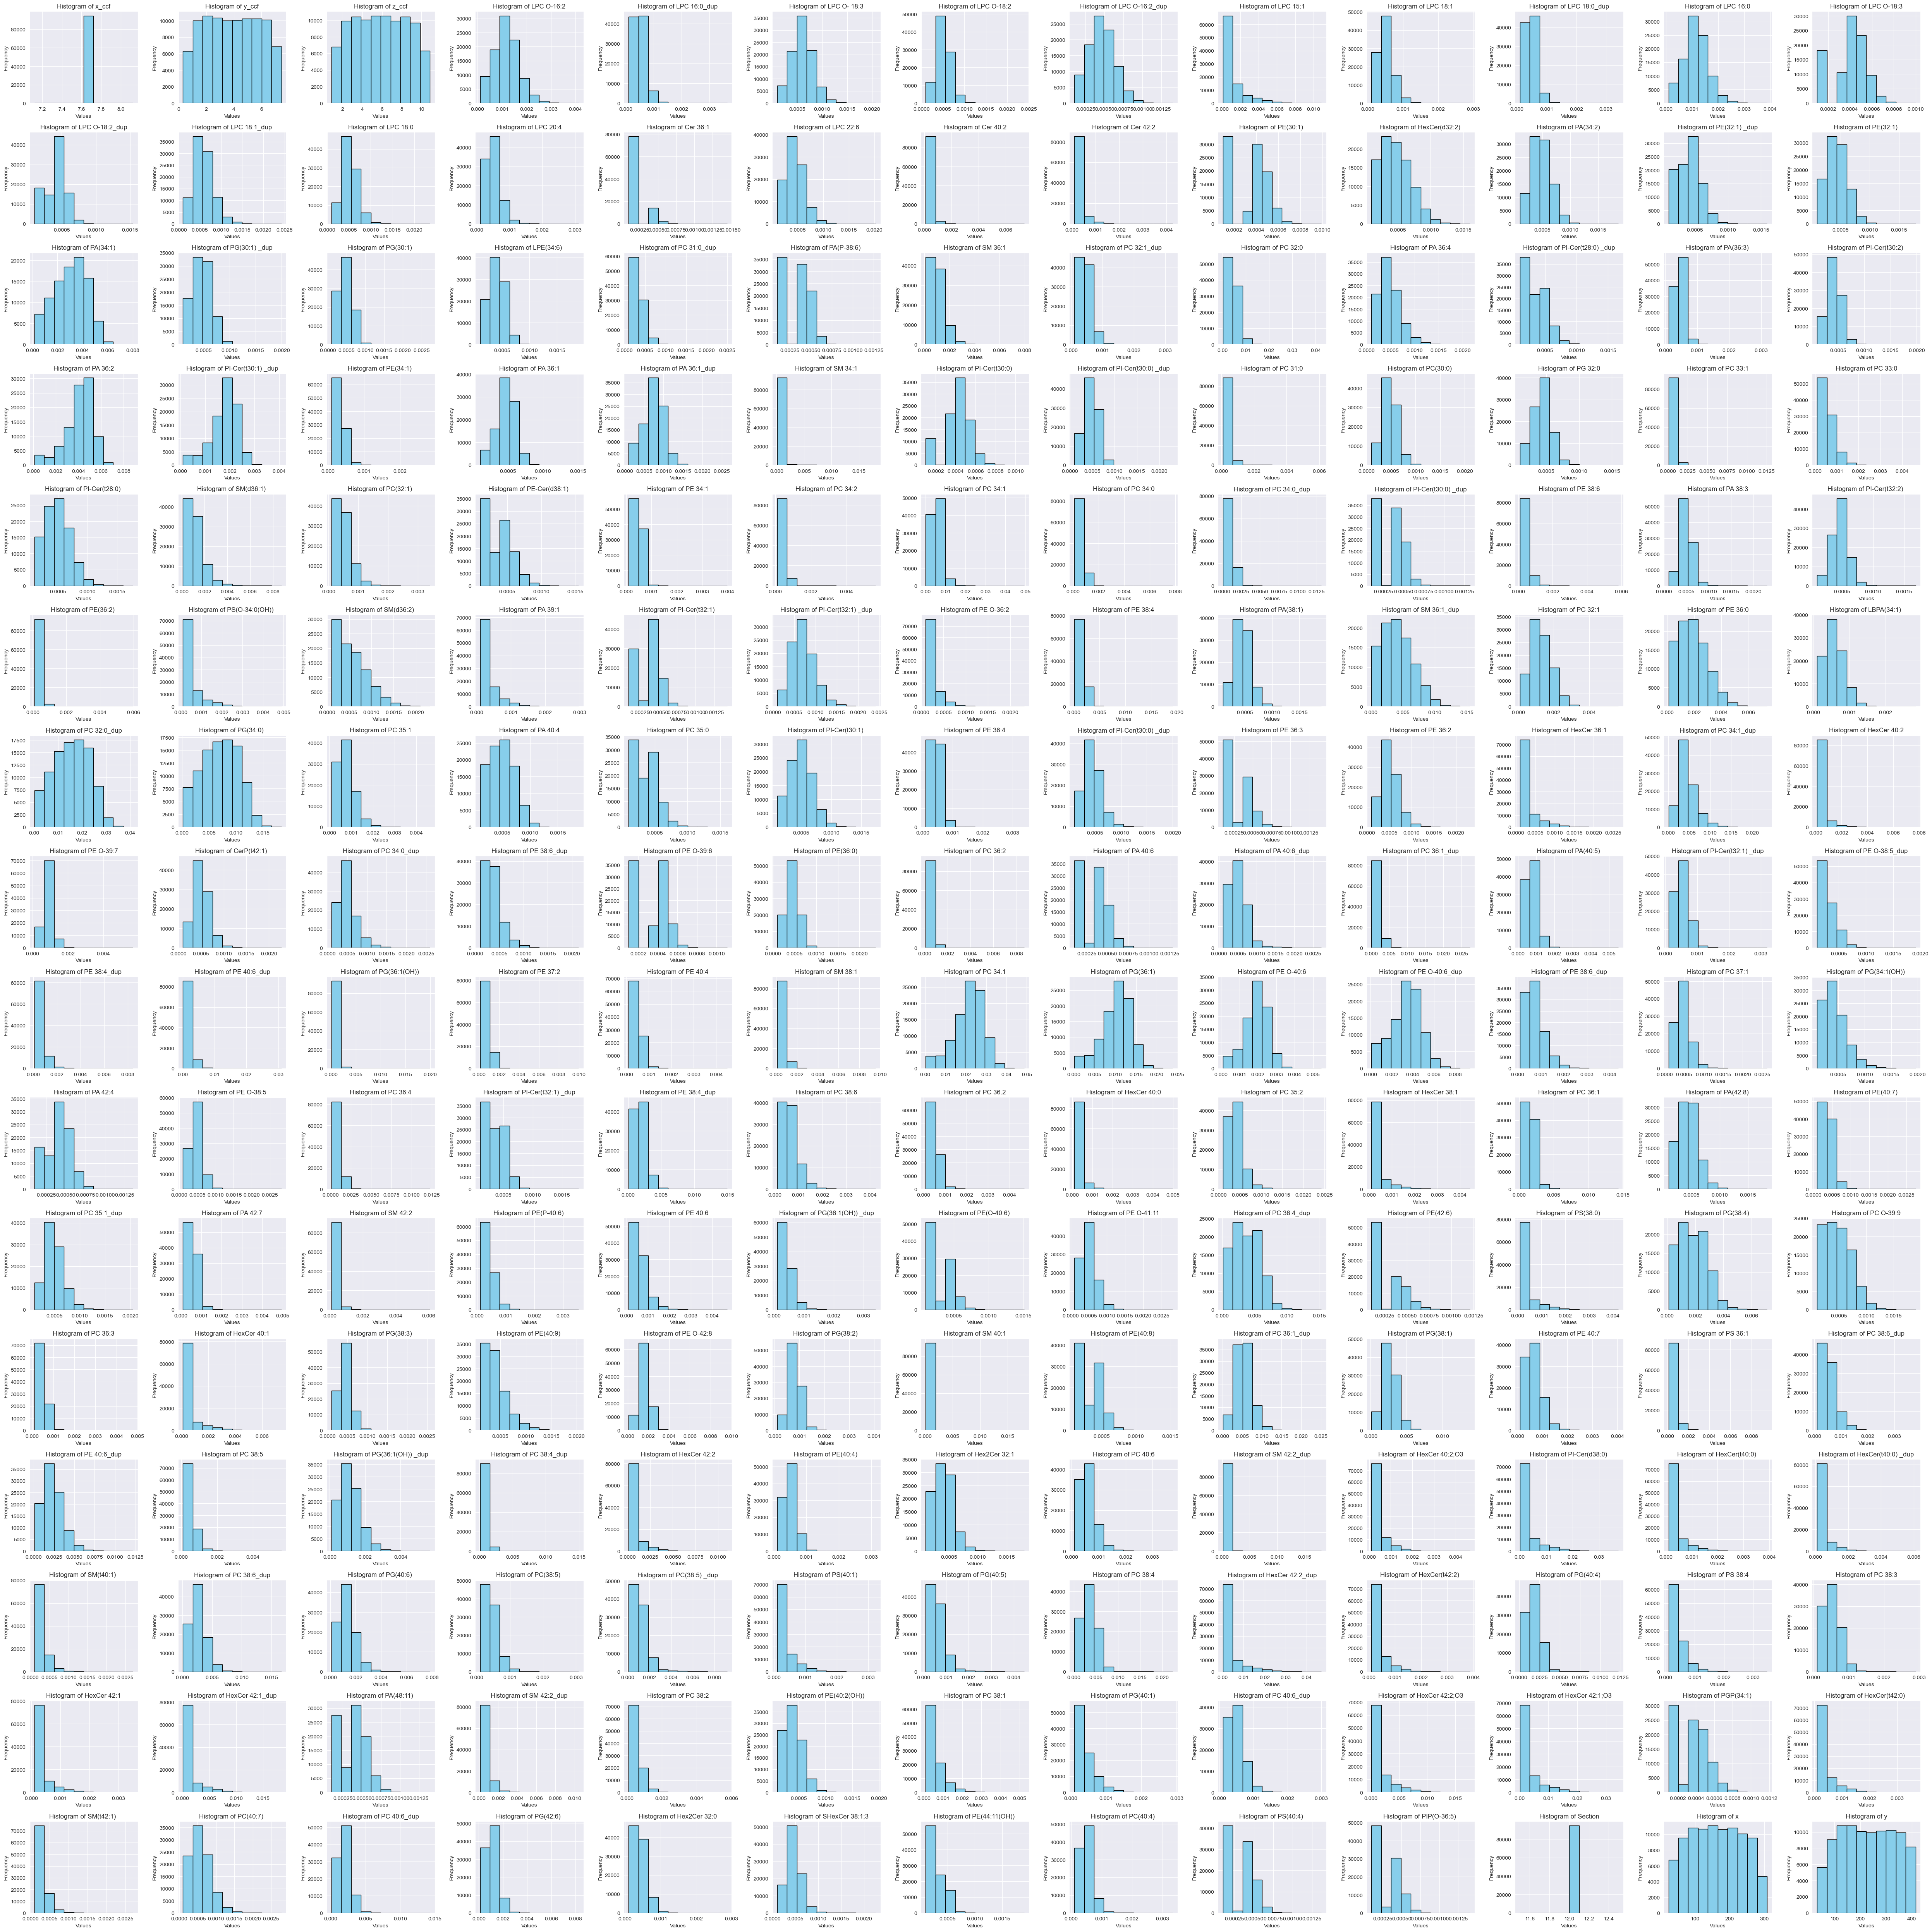

In [38]:
rows = 16
columns = 13

assert rows * columns <= 208

fig, ax = plt.subplots(rows, columns, figsize=(50, 50))

for i in range(rows):
    for j in range(columns):
        assert i * columns + j < 208
        data = section_12.iloc[:, i * columns + j].values
        ax[i, j].hist(data, bins=10, color='skyblue', edgecolor='black')
        ax[i, j].set_xlabel('Values')
        ax[i, j].set_ylabel('Frequency')
        ax[i, j].set_title(f'Histogram of {section_12.columns.values[i * columns + j]}')

plt.tight_layout()

# Correlation and Clustering

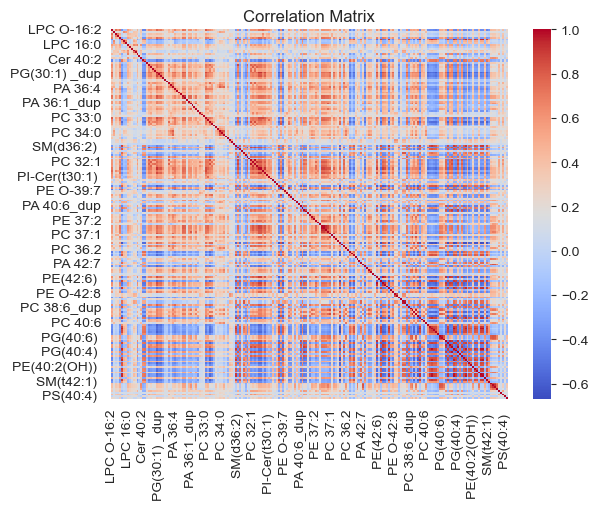

,LPC O-16:2,LPC 16:0_dup,LPC O- 18:3,LPC O-18:2,LPC O-16:2_dup,LPC 15:1,LPC 18:1,LPC 18:0_dup,LPC 16:0,LPC O-18:3,...,SM(t42:1),PC(40:7),PC 40:6_dup,PG(42:6),Hex2Cer 32:0,SHexCer 38:1;3,PE(44:11(OH)),PC(40:4),PS(40:4),PIP(O-36:5)
LPC O-16:2,1.000000,0.211690,0.735316,0.600972,0.708724,-0.391074,-0.123568,-0.141440,0.571061,0.457548,...,-0.373368,0.426424,0.403325,0.400589,0.298737,0.369813,0.074109,0.410831,-0.005455,0.241044
LPC 16:0_dup,0.211690,1.000000,0.178710,0.165475,0.132870,0.107091,0.650639,0.579806,0.439880,0.097779,...,0.004930,0.184355,0.184659,0.183346,0.170909,0.110814,0.131908,0.101956,0.136431,0.217095
LPC O- 18:3,0.735316,0.178710,1.000000,0.693648,0.486806,-0.023535,0.090267,0.036584,0.447564,0.407158,...,-0.118727,0.348658,0.357269,0.353498,0.262022,0.293732,0.044103,0.365110,0.088803,0.111675
LPC O-18:2,0.600972,0.165475,0.693648,1.000000,0.383360,0.035320,0.118154,0.127293,0.365594,0.337227,...,-0.057202,0.250112,0.310934,0.307961,0.223902,0.282329,0.039322,0.400375,0.114914,0.073085
LPC O-16:2_dup,0.708724,0.132870,0.486806,0.383360,1.000000,-0.316010,-0.166382,-0.189889,0.546651,0.473299,...,-0.318264,0.486488,0.464979,0.459173,0.337604,0.403454,0.154237,0.396000,0.041773,0.306109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SHexCer 38:1;3,0.369813,0.110814,0.293732,0.282329,0.403454,-0.149033,-0.031272,-0.027565,0.387388,0.291946,...,-0.184398,0.316615,0.263241,0.263118,0.070457,1.000000,0.085002,0.543097,0.163173,0.192778
PE(44:11(OH)),0.074109,0.131908,0.044103,0.039322,0.154237,0.111472,0.112445,0.097161,0.101605,0.118372,...,0.077421,0.075373,0.089560,0.086670,0.065295,0.085002,1.000000,0.066108,0.145563,0.121343
PC(40:4),0.410831,0.101956,0.365110,0.400375,0.396000,-0.148293,-0.029652,0.011802,0.386691,0.289939,...,-0.204648,0.266352,0.304783,0.303832,0.177933,0.543097,0.066108,1.000000,0.194385,0.130699
PS(40:4),-0.005455,0.136431,0.088803,0.114914,0.041773,0.257407,0.228711,0.205229,0.071601,0.088258,...,0.171835,-0.028909,-0.020546,-0.019191,-0.037126,0.163173,0.145563,0.194385,1.000000,0.040954


In [39]:
# Example: Correlation matrix
lipids_section_12 = section_12.iloc[:, 3:-3]
correlation_matrix = lipids_section_12.corr(method='spearman')
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

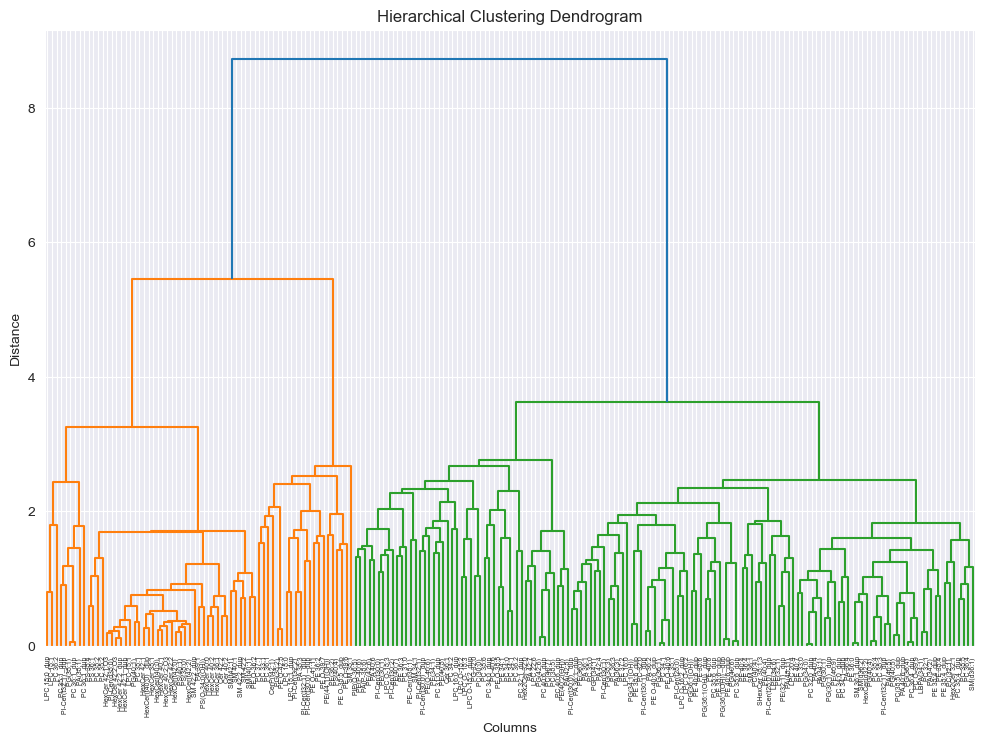

In [40]:
correlation_matrix = np.nan_to_num(correlation_matrix)

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(correlation_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=lipids_section_12.columns, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Columns')
plt.ylabel('Distance')
plt.show()

In [41]:
# Cut the dendrogram to obtain clusters
threshold = 2  # Adjust the threshold as needed
clusters_dendrogram = hierarchy.fcluster(linkage_matrix, t=threshold, criterion='distance')

# Create a dictionary to store columns for each cluster
cluster_columns_dendrogram = {}

# Iterate through columns and their corresponding cluster labels
for col, clusters_dendrogram in zip(lipids_section_12.columns, clusters_dendrogram):
    if clusters_dendrogram not in cluster_columns_dendrogram:
        cluster_columns_dendrogram[clusters_dendrogram] = []
    cluster_columns_dendrogram[clusters_dendrogram].append(col)

# Print or use the list of columns in each cluster
for clusters_dendrogram, columns in cluster_columns_dendrogram.items():
    print(f"Cluster {clusters_dendrogram} columns: {columns}")

Cluster 4 columns: ['LPC O-16:2', 'LPC O-16:2_dup', 'LPC 16:0', 'PC 32:0', 'PA(36:3)\xa0', 'PA 36:2', 'PI-Cer(t30:1)\xa0_dup', 'PA 36:1', 'PA 36:1_dup', 'PI-Cer(t30:0)\xa0_dup', 'PI-Cer(t28:0)\xa0', 'PC 35:1', 'PC 35:0', 'PI-Cer(t30:1)\xa0', 'PE(36:0)\xa0', 'PE 37:2', 'PC 34.1', 'PG(36:1)\xa0', 'PE O-40:6', 'PE O-40:6_dup', 'PE 38:6_dup', 'PG(34:1(OH))\xa0', 'PA 42:4', 'PC 36:3', 'PG(38:3)\xa0', 'PGP(34:1) ']
Cluster 11 columns: ['LPC 16:0_dup', 'PC 34:2']
Cluster 10 columns: ['LPC O- 18:3', 'LPC O-18:2', 'LPC O-18:2_dup']
Cluster 22 columns: ['LPC 15:1', 'Cer 40:2', 'Cer 42:2', 'PS(O-34:0(OH))\xa0', 'PA 39:1', 'PE O-36:2', 'HexCer 36:1', 'HexCer 40:2', 'HexCer 40:0', 'PC 35:2', 'HexCer 38:1', 'SM 42:2', 'PS(38:0)\xa0', 'HexCer 40:1', 'SM 40:1', 'PS 36:1', 'HexCer 42:2', 'SM 42:2_dup', 'HexCer 40:2;O3', 'PI-Cer(d38:0)\xa0', 'HexCer(t40:0)\xa0', 'HexCer(t40:0)\xa0_dup', 'SM(t40:1)\xa0', 'PS(40:1)\xa0', 'HexCer 42:2_dup', 'HexCer(t42:2)\xa0', 'PS 38:4', 'HexCer 42:1', 'HexCer 42:1_dup', 

/Users/violarenne/opt/anaconda3/envs/ml-project-2-genelipids/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/violarenne/opt/anaconda3/envs/ml-project-2-genelipids/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/violarenne/opt/anaconda3/envs/ml-project-2-genelipids/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


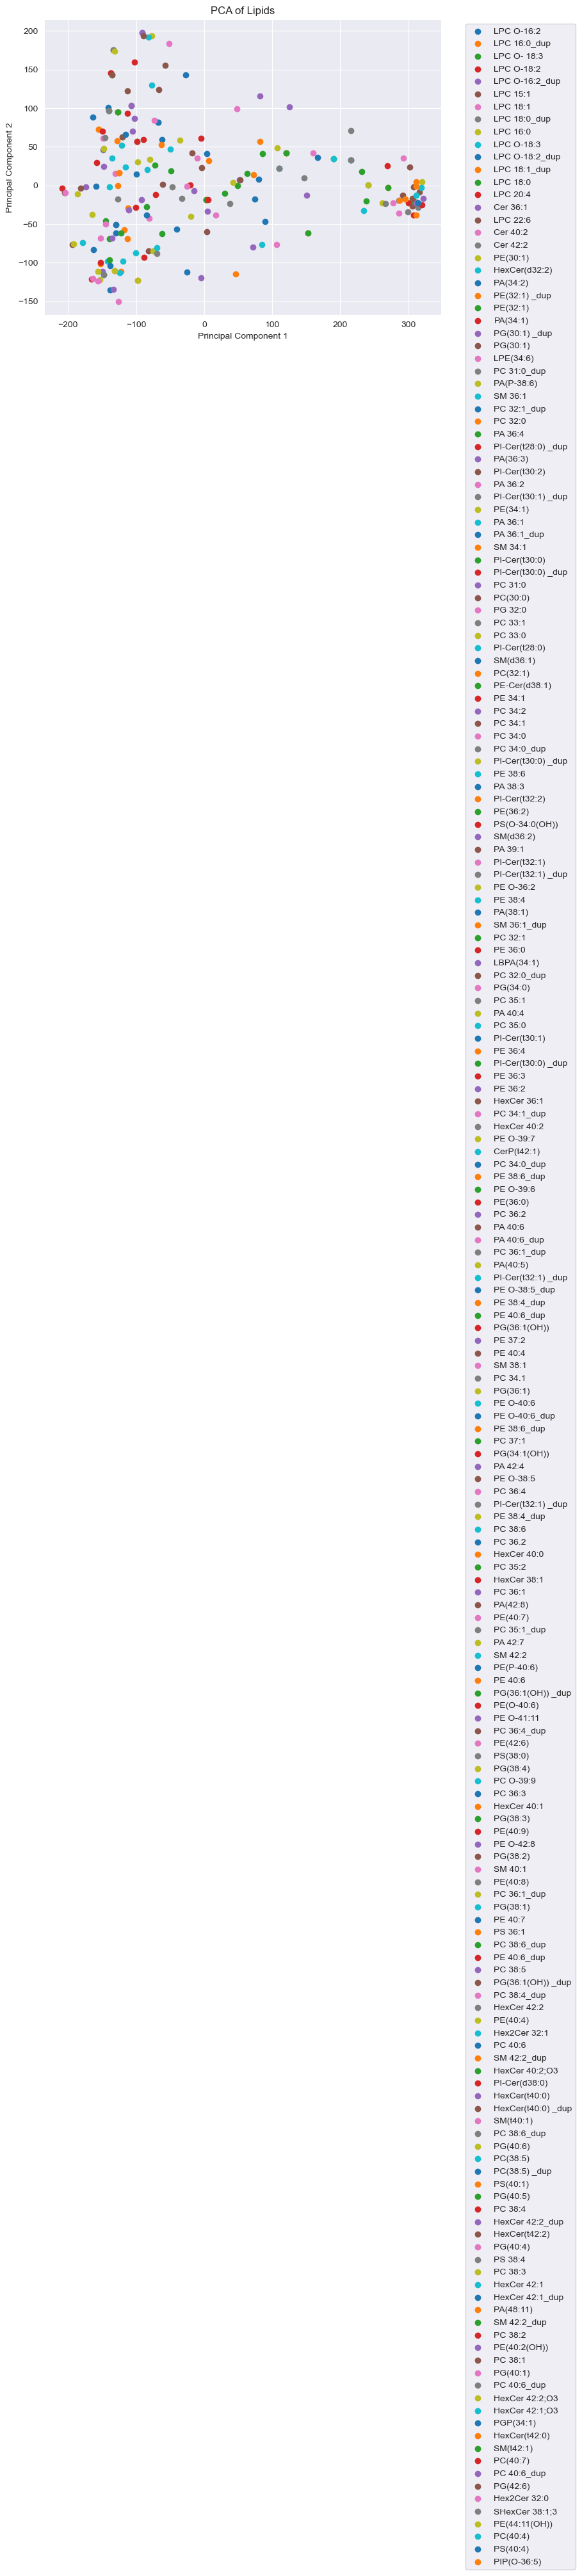

In [42]:
lipids_section_12_standardized = (lipids_section_12 - np.mean(lipids_section_12, axis=0)) / np.std(lipids_section_12, axis=0)

# Apply PCA with the desired number of components
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(lipids_section_12_standardized.T)  # Transpose DataFrame for column-wise PCA

# Create a DataFrame for better visualization
columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=principal_components, columns=columns, index=lipids_section_12.columns)

# Visualize the results
plt.figure(figsize=(8, 6))
for column_name in df_pca.index:
    plt.scatter(df_pca.loc[column_name, 'PC1'],
                df_pca.loc[column_name, 'PC2'],
                label=column_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Lipids')
# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/Users/violarenne/opt/anaconda3/envs/ml-project-2-genelipids/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/violarenne/opt/anaconda3/envs/ml-project-2-genelipids/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/violarenne/opt/anaconda3/envs/ml-project-2-genelipids/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/violarenne/opt/anaconda3/envs/ml-project-2-genelipids/lib/pyth

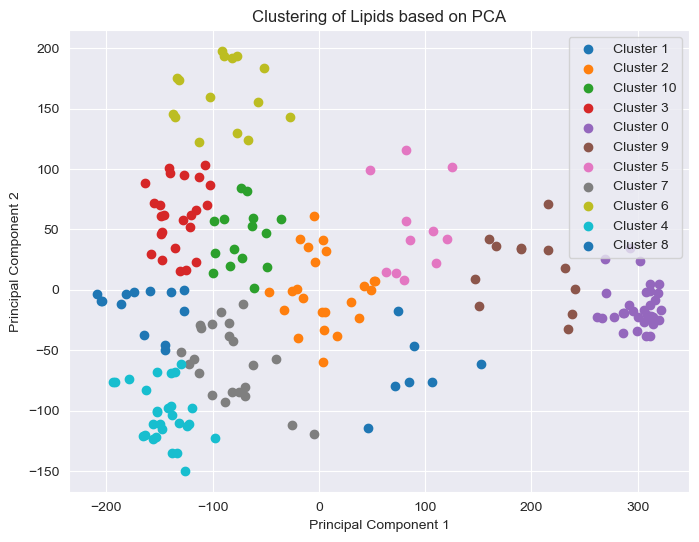

In [62]:
# Perform K-Means clustering on the PCA components
n_clusters = 11  # You can adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters_pca = kmeans.fit_predict(df_pca)

# Add cluster labels to the DataFrame
df_pca['Cluster'] = clusters_pca

# Visualize the clustered data
plt.figure(figsize=(8, 6))
for cluster_label_pca in df_pca['Cluster'].unique():
    indices_to_keep = df_pca['Cluster'] == cluster_label_pca
    plt.scatter(df_pca.loc[indices_to_keep, 'PC1'],
                df_pca.loc[indices_to_keep, 'PC2'],
                label=f'Cluster {cluster_label_pca}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of Lipids based on PCA')
plt.legend()
plt.show()

In [63]:
# Group columns based on their cluster labels
clustered_columns = df_pca.groupby('Cluster').apply(lambda x: x.index.tolist())

# Print the lists of columns for each cluster
for cluster_label, columns_list in clustered_columns.items():
    print(f"Cluster {cluster_label}: {columns_list}")

Cluster 0: ['LPC 15:1', 'Cer 40:2', 'Cer 42:2', 'PS(O-34:0(OH))\xa0', 'PA 39:1', 'PE O-36:2', 'HexCer 36:1', 'HexCer 40:2', 'HexCer 40:0', 'HexCer 38:1', 'PS(38:0)\xa0', 'HexCer 40:1', 'PS 36:1', 'HexCer 42:2', 'HexCer 40:2;O3', 'PI-Cer(d38:0)\xa0', 'HexCer(t40:0)\xa0', 'HexCer(t40:0)\xa0_dup', 'SM(t40:1)\xa0', 'PS(40:1)\xa0', 'HexCer 42:2_dup', 'HexCer(t42:2)\xa0', 'PS 38:4', 'HexCer 42:1', 'HexCer 42:1_dup', 'SM 42:2_dup', 'PC 38:2', 'PC 38:1', 'PG(40:1)\xa0', 'HexCer 42:2;O3', 'HexCer 42:1;O3', 'HexCer(t42:0)\xa0']
Cluster 1: ['LPC O-16:2', 'PA(34:1)', 'PG(30:1)\xa0_dup', 'PG(30:1)\xa0', 'PC 32:0', 'PA 36:4', 'PC 33:0', 'PI-Cer(t28:0)\xa0', 'PC 32:0_dup', 'PG(34:0)\xa0', 'PC 35:1', 'PA 40:4', 'PC 34:1_dup']
Cluster 2: ['LPC 16:0_dup', 'LPC O-18:2', 'LPC O-18:2_dup', 'Cer 36:1', 'PC 31:0_dup', 'PE(34:1)\xa0', 'PC(30:0)\xa0', 'PG 32:0', 'PC 33:1', 'PE 34:1', 'PC 34:2', 'PC 34:1', 'PC 34:0', 'PI-Cer(t30:0)\xa0_dup', 'PE(36:2)\xa0', 'PI-Cer(t32:1)\xa0', 'PC 37:1', 'PE O-38:5', 'PE(O-40:

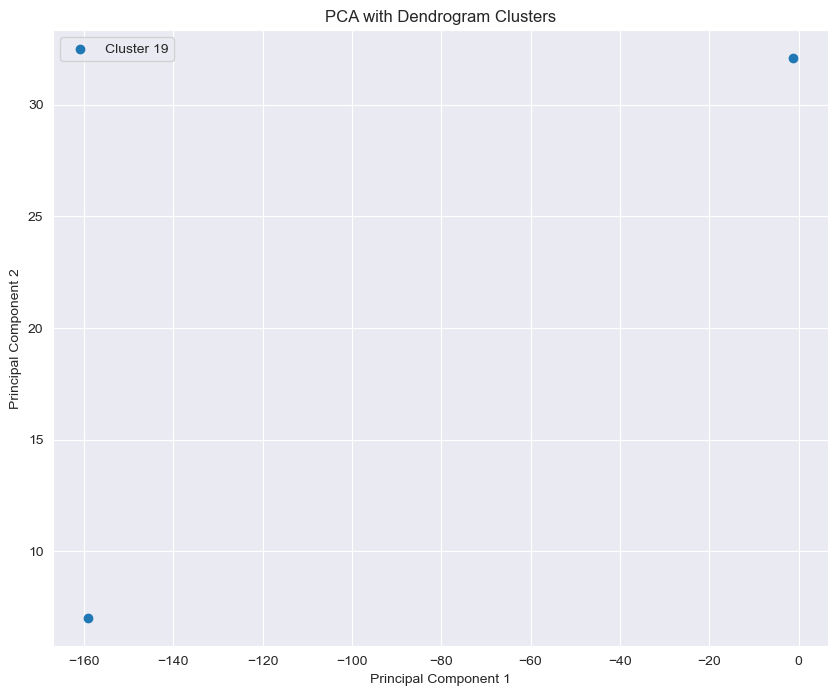

In [65]:
# Visualize the PCA with cluster assignments
plt.figure(figsize=(10, 8))
for cluster_label in np.unique(clusters_dendrogram):
    indices_to_keep = clusters_dendrogram == cluster_label
    plt.scatter(principal_components[indices_to_keep, 0],
                principal_components[indices_to_keep, 1],
                label=f'Cluster {cluster_label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with Dendrogram Clusters')
plt.legend()
plt.show()